In [2]:
import time
import os
import cv2
import matplotlib.pyplot as plt
from lib.utilities import *
import numpy as np
import pandas as pd

In [3]:
data_dir = "C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/"
cell_type_prefix = 'pv'
plt.rcParams.update({'font.size': 13})
#plt.rcParams['figure.figsize'] = [20, 12]

In [12]:
kate_pv_file = data_dir + '/Kate\'s/Kate-reanalysis-modular.csv'
csv_columns = ['Date',
             'Rec',
             'Stim Loc',
               'Genotype',
               'Sex',
               'Age',
             'L2/3 A Latency',
               'L4 A Latency',
               'L5 A Latency',
               'L2/3 B Latency',
               'L4 B Latency',
               'L5 B Latency',
               'L2/3 C Latency',
               'L4 C Latency',
               'L5 C Latency',
               'L2/3 D Latency',
               'L4 D Latency',
               'L5 D Latency',
               'L2/3 E Latency',
               'L4 E Latency',
               'L5 E Latency',
             ]
def parse_latency_with_parens(v):
    """ return either [latency1] or [latency1, latency2]"""
    if type(v) in [float, int]:
        return v
    try:
        v = float(v)
        return [v]
    except Exception as e:
        pass
    v = v.split("(")
    v[1] = v[1].replace(")", '').replace("+", '')
    v = [float(x) for x in v]
    v[1] += v[0]
    return v

In [13]:
print(parse_latency_with_parens('50.1126 (+4.3)'))
print(parse_latency_with_parens('50.112'))

[50.1126, 54.4126]
[50.112]


In [5]:
# load the CSV
df = pd.read_csv(kate_pv_file)
df = pd.DataFrame(df)
df

,Date,Rec,Genotype,Age,Sex,Stim Loc,L2/3 A Latency,L4 A Latency,L5 A Latency,L2/3 B Latency,...,L5 B Latency,L2/3 C Latency,L4 C Latency,L5 C Latency,L2/3 D Latency,L4 D Latency,L5 D Latency,L2/3 E Latency,L4 E Latency,L5 E Latency
0,1/11/2020,09_01_01,FXR1,53,F,L2/3 B,54.8205,54.5535,54.862,53.9293,...,54.5751,54.271,53.8947,NaN,54.0786,NaN,NaN,NaN,NaN,NaN
1,1/18/2021,04_01_02,PV,49,M,L2/3 C,53.8029,53.8811,NaN,53.3963,...,NaN,49.8387 (+3.5),53.3491,53.7246,53.44,53.6922,53.6004,54.2031,53.8515,54.6566
2,1/18/2021,05_01_03,PV,49,M,L2/3 B,52.8377,52.9616,53.486,52.8154,...,53.396,53.6586,53.6076,53.6134,NaN,NaN,NaN,NaN,NaN,NaN
3,1/18/2021,07_01_02,PV,49,M,L2/3 C,52.8154,52.8366,53.396,54.5388,...,54.649,54.0642,54.0226,54.4297,50.4106 (+4),52.1609,52.7517,51.1995,53.5592,54.0431
4,1/19/2021,05_01_01,PV,50,F,L2/3 A,51.3762 (+4.8),54.6994,54.7604,55.1393,...,55.0929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,12/28/2020,08_01_04,FXR1,45,F,L4 A,53.0776,50.4254,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,12/29/2020,04_01_01,FXR1,46,F,L4 B,NaN,53.3985,63.6236,53.3501,...,53.1769,53.7183,53.1548,53.4307,NaN,53.5447,53.6649,NaN,NaN,NaN
63,12/29/2020,06_01_01,FXR1,46,F,L4 B,53.6919,52.6099,52.7603,53.2858,...,52.5961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,12/29/2020,07_01_03,FXR1,46,F,L4 B,53.6564,54.1688,NaN,53.2094,...,54.1532,53.2611,51.6339,53.0609,53.813,NaN,NaN,NaN,NaN,NaN


In [ ]:
# campare:
#   interlaminar by direction (L2/3 -> L5 vs L5 -> L2/3)
#   count probability of crossing layer or barrel
#   Latency of second activation

Latency between barrel pairs in L2/3
	 0.900 +/- 0.579 (n = 14)
	 [1.3583 1.8089 0.5078 0.8922 1.1776 0.2455 0.0147 1.6877 0.7226 1.9021
 0.7541 0.433  0.7534 0.3538]
Latency between barrel pairs in L4
	 0.678 +/- 0.526 (n = 15)
	 [0.1687 1.0151 1.3033 0.826  0.456  0.0656 0.4992 0.8238 1.2135 0.2154
 0.1898 0.4909 0.6745 2.048  0.1808]
Latency between barrel pairs in L5
	 0.793 +/- 0.475 (n = 6)
	 [0.1239 0.5098 1.4949 0.5802 0.724  1.3297]


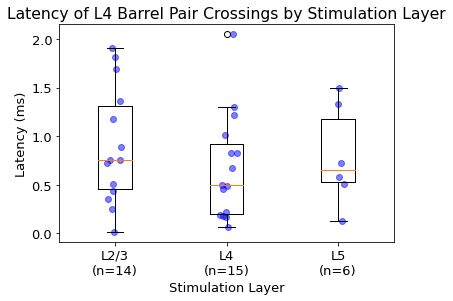

In [5]:
# plot latency spreads, separated by layer

plt.clf()
i = 1
xtick_labels = []
df_datasets = []
for stim_loc in ['L2/3', 'L4', 'L5']:
    df2 = df[df['Stim Location'].str.contains(stim_loc)]
    dfd1 = df2['abs(delta 1)'].dropna()
    dfd2 = df2['abs(delta 2)'].dropna()

    print("Latency between barrel pairs in", stim_loc)
    dfds = np.concatenate([dfd1, dfd2])
    print("\t", 
          str(np.mean(dfds))[:5], 
          "+/-", 
          str(np.std(dfds))[:5], 
          "(n =", 
          str(len(dfds)) + ")")
    print("\t", dfds)
    
    jittered_xs = np.random.normal(i, 0.04, dfds.shape[0])
    plt.scatter(jittered_xs, dfds, alpha=0.5, color='blue')

    xtick_labels.append(stim_loc + "\n(n=" + str(len(dfds)) +")")
    df_datasets.append(dfds)
    i += 1

plt.boxplot(df_datasets)
plt.xticks(range(1, len(xtick_labels)+1), xtick_labels)
plt.title("Latency of L4 Barrel Pair Crossings by Stimulation Layer")
plt.xlabel("Stimulation Layer")
plt.ylabel("Latency (ms)")
plt.savefig(data_dir + cell_type_prefix + "_results_latency_prelim_6-30-23.png")
plt.show()

     Index     Cell 1     Cell 2     Cell 3
0        0  11.465200  15.436400  11.959000
1        1  10.643300  14.161100  11.154400
2        2   9.257740  12.330300   9.668380
3        3   7.476610  10.021500   7.665680
4        4   5.780280   7.693800   5.675050
..     ...        ...        ...        ...
195    195   0.783194   0.808717   0.887737
196    196   0.874195   1.305960   0.800768
197    197   0.787404   1.790920   0.507184
198    198   0.695885   2.293020   0.111556
199    199   0.806976   2.752740  -0.187036

[200 rows x 4 columns]


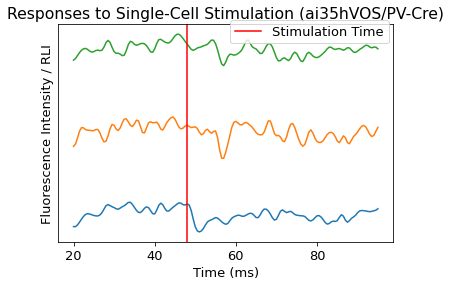

In [21]:
# 6/30 single cell stim traces
traces_barrel_1 = data_dir + "06-30-23/selected_zda/Traces_03_02_04.dat"
traces_barrel_1 = pd.read_csv(traces_barrel_1,
                         sep='\t',
                         header=0,
                         names=['Index',  'Cell 1',  'Cell 2',  'Cell 3'])
print(traces_barrel_1)
plt.clf()
start_cut = 40
end_cut = 190
baseline = 10
v1 = traces_barrel_1.loc[start_cut:end_cut, ["Cell 1"]] + baseline
v2 = traces_barrel_1.loc[start_cut:end_cut, ["Cell 2"]] + baseline * 2
v3 = traces_barrel_1.loc[start_cut:end_cut, ["Cell 3"]] + baseline * 3
t = [(i+start_cut) * 0.5 for i in range(len(v1))]
plt.plot(t, v1)
plt.plot(t, v2)
plt.plot(t, v3)
plt.axvline(x=48, label="Stimulation Time", color='red')
plt.legend(bbox_to_anchor=(0.75, 1.05), loc='upper center')
plt.yticks([])
plt.xlabel("Time (ms)")
plt.ylabel("Fluorescence Intensity / RLI")
plt.title("Responses to Single-Cell Stimulation (ai35hVOS/" + cell_type_prefix + "-Cre)")
plt.savefig(data_dir + "06-30-23/selected_zda/" + cell_type_prefix + "_traces-single-cell.png")
plt.show()